## *** Toyota Car Price Prediction ***

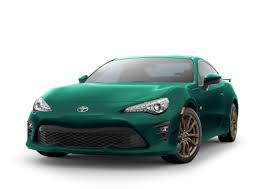

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [7]:
#Reading the dataset
car=pd.read_csv("\\Toyota.csv",index_col=0) 
car.head(15)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
5,12950,32.0,61000,Diesel,90,0.0,0,2000,3,1170
6,16900,27.0,??,Diesel,????,NaN,0,2000,3,1245
7,18600,30.0,75889,NaN,90,1.0,0,2000,3,1245
8,21500,27.0,19700,Petrol,192,0.0,0,1800,3,1185
9,12950,23.0,71138,Diesel,????,NaN,0,1900,3,1105


In [8]:
#Reading the dataset
car=pd.read_csv("\\Toyota.csv",index_col=0,na_values=["??","????"]) #Replace "??" and "????" into Null values.
car.head(15)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170
5,12950,32.0,61000.0,Diesel,90.0,0.0,0,2000,3,1170
6,16900,27.0,NaN,Diesel,NaN,NaN,0,2000,3,1245
7,18600,30.0,75889.0,NaN,90.0,1.0,0,2000,3,1245
8,21500,27.0,19700.0,Petrol,192.0,0.0,0,1800,3,1185
9,12950,23.0,71138.0,Diesel,NaN,NaN,0,1900,3,1105


#### Preprocessing the dataset

In [9]:
#Descriptive Statistics
print("The dimension of data:",car.shape)
print("The size of dataset:",car.size)
print("The list of Columns\n\n",car.columns)
print("The data information\n\n",car.info())
print("The Data Description\n\n",car.describe())
print("Checking of the null values within the dataset",car.isnull().sum())


The dimension of data: (1436, 10)
The size of dataset: 14360
The list of Columns

 Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
Price        1436 non-null int64
Age          1336 non-null float64
KM           1421 non-null float64
FuelType     1336 non-null object
HP           1430 non-null float64
MetColor     1286 non-null float64
Automatic    1436 non-null int64
CC           1436 non-null int64
Doors        1436 non-null object
Weight       1436 non-null int64
dtypes: float64(4), int64(4), object(2)
memory usage: 123.4+ KB
The data information

 None
The Data Description

               Price          Age             KM           HP     MetColor  \
count   1436.000000  1336.000000    1421.000000  1430.000000  1286.000000   
mean   10730.824513    55.672156   68647.239972   101.478322     0.674961 

***Note:
1. There are missing values in the dataset.
2. MetColor and Automatic are nominal variables. So, they are required to change the type of data.
3. Renaming the "Doors" values are required.
4. Age        1336 
   KM         1421 
   FuelType   1336  
   HP         1430 
   MetColor   1286
There are lot of missing values.

In [10]:
# Changing the data type
car[['MetColor','Automatic']] = car[['MetColor','Automatic']].astype('object')
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
Price        1436 non-null int64
Age          1336 non-null float64
KM           1421 non-null float64
FuelType     1336 non-null object
HP           1430 non-null float64
MetColor     1286 non-null object
Automatic    1436 non-null object
CC           1436 non-null int64
Doors        1436 non-null object
Weight       1436 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 123.4+ KB


In [11]:
car['Doors'].unique() #Required to rename the values of Doors variable.

array(['three', '3', '5', '4', 'four', 'five', '2'], dtype=object)

In [12]:
car['Doors'].replace('three',3,inplace=True)
car['Doors'].replace('four',4,inplace=True)
car['Doors'].replace('five',5,inplace=True)
car['Doors'].replace('2',2,inplace=True)
car['Doors'].replace('3',3,inplace=True)
car['Doors'].replace('4',4,inplace=True)
car['Doors'].replace('5',5,inplace=True)

In [15]:
car['Doors'].unique()
car['Doors'].astype('int')

0       3
1       3
2       3
3       3
4       3
       ..
1431    3
1432    3
1433    3
1434    3
1435    5
Name: Doors, Length: 1436, dtype: int32

#### Handling the missing values.

In [11]:
##Checking for null values
car.isnull().sum()

Price          0
Age          100
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [12]:
car.describe(exclude=['int','float'])
car.describe(include='O')

,FuelType,MetColor,Automatic
count,1336,1286.0,1436
unique,3,2.0,2
top,Petrol,1.0,0
freq,1177,868.0,1356


C:\Users\Urmisha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:836: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Urmisha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:837: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


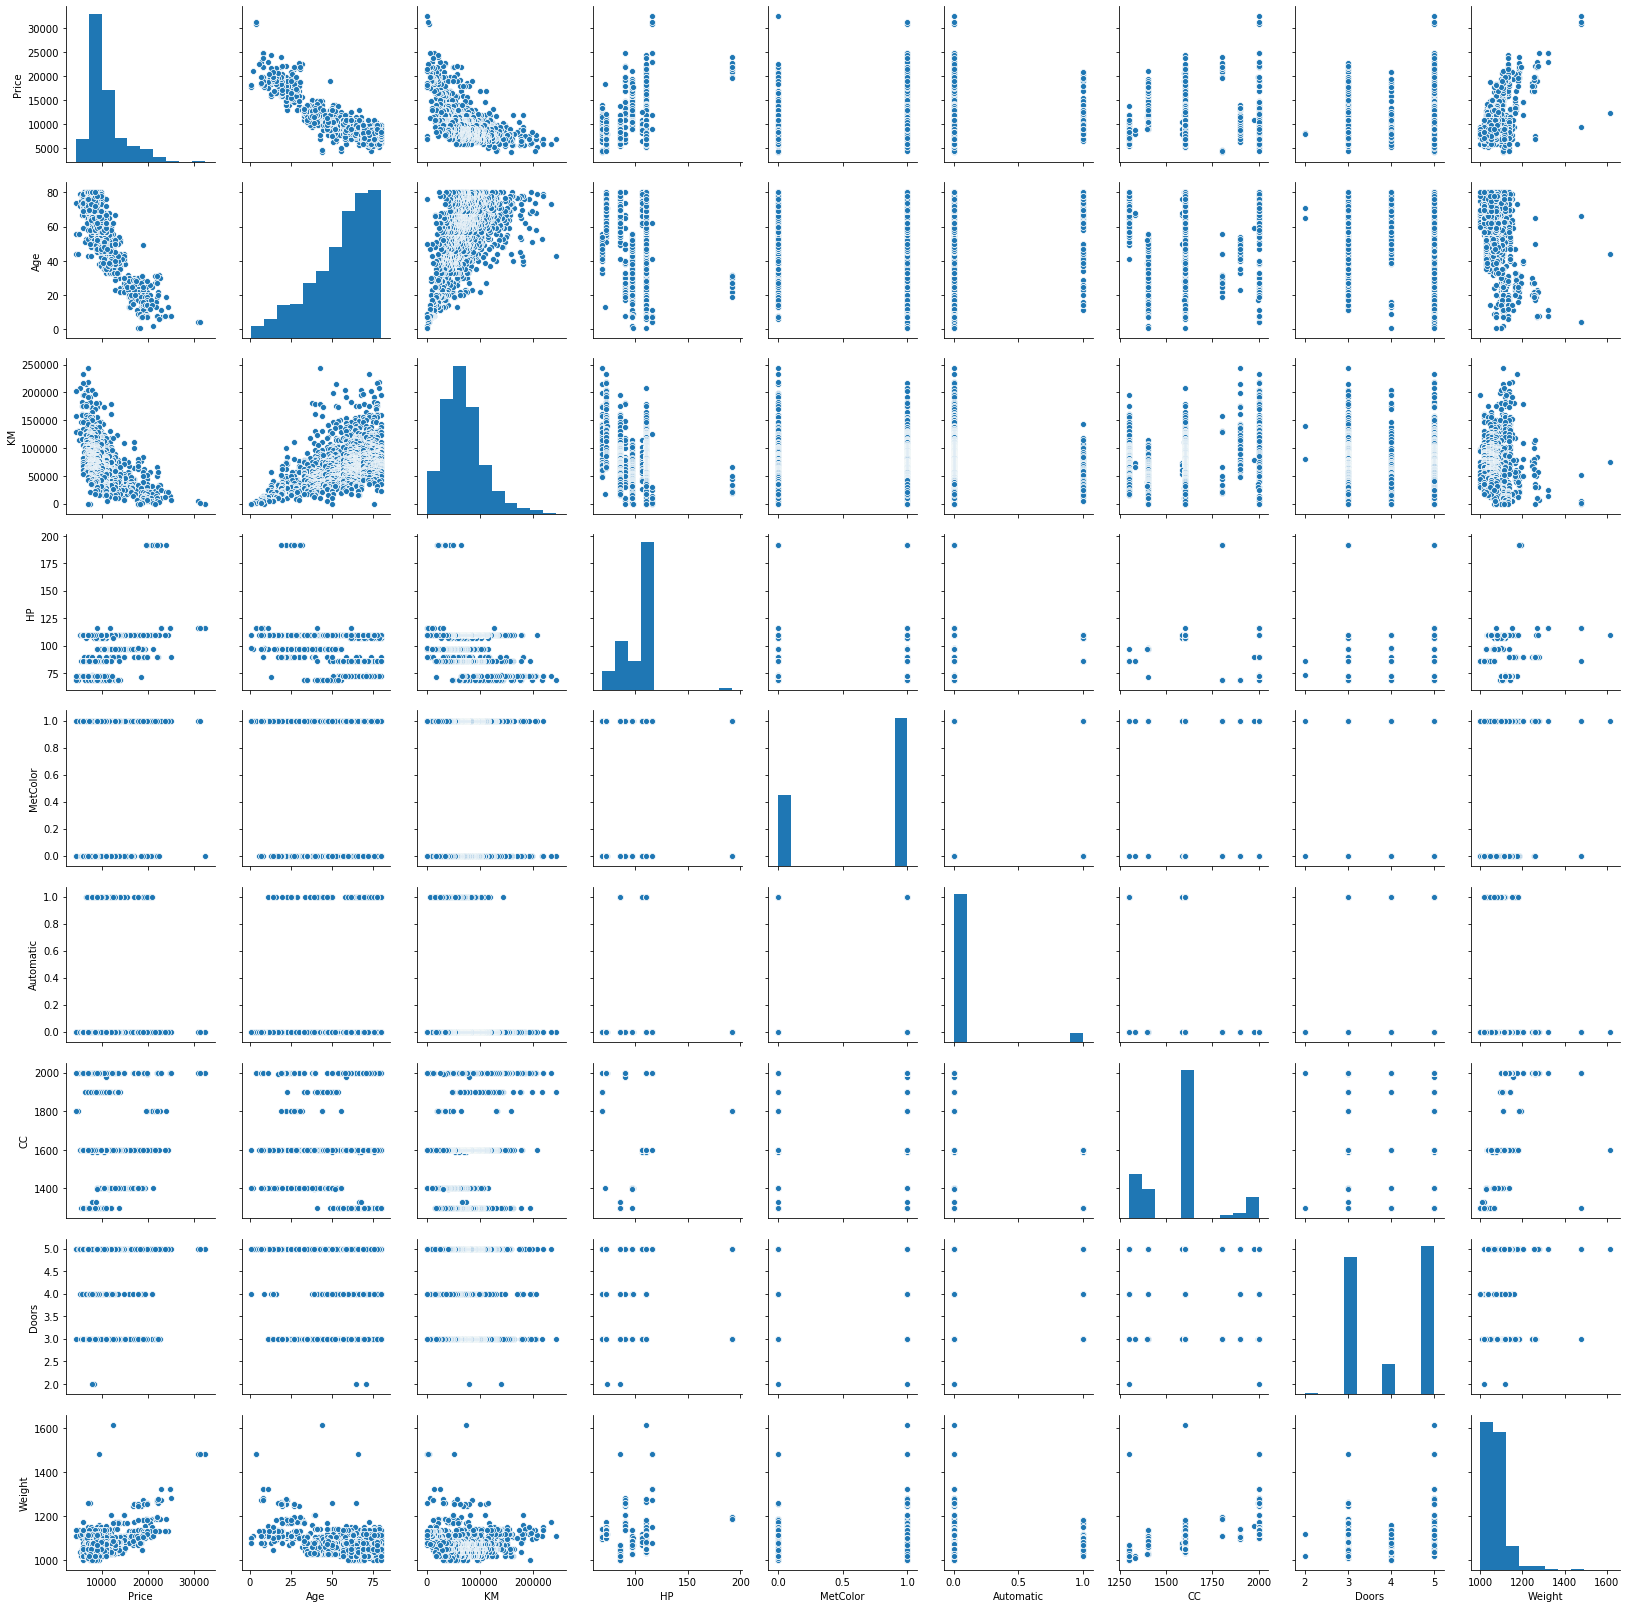

In [16]:
##Visualise the data
sns.pairplot(car)

In [14]:
car['Age'].describe() 

count    1336.000000
mean       55.672156
std        18.589804
min         1.000000
25%        43.000000
50%        60.000000
75%        70.000000
max        80.000000
Name: Age, dtype: float64

In [17]:
# mean < median. Therefore, Age is left skewed.
car['Age'].fillna(car['Age'].median(), inplace=True)
car['Age'].describe() 

count    1436.000000
mean       55.973538
std        17.964211
min         1.000000
25%        44.000000
50%        60.000000
75%        68.000000
max        80.000000
Name: Age, dtype: float64

In [16]:
car['KM'].describe() #mean > median. So,Data distribution is Right- Skewed.

count      1421.000000
mean      68647.239972
std       37333.023589
min           1.000000
25%       43210.000000
50%       63634.000000
75%       87000.000000
max      243000.000000
Name: KM, dtype: float64

In [18]:
car['KM'].fillna(car['KM'].mean(), inplace=True)
car['KM'].mean()

68647.2399718508

In [19]:
car['HP'].loc[5:16]
car['HP'].fillna(car['HP'].mean(), inplace=True)
car['HP'].mean()


101.47832167832169

In [19]:
car['FuelType'].value_counts()

Petrol    1177
Diesel     144
CNG         15
Name: FuelType, dtype: int64

In [20]:
car['FuelType'].mode() # most frequently occured value

0    Petrol
dtype: object

In [21]:
car['MetColor'].value_counts()

1.0    868
0.0    568
Name: MetColor, dtype: int64

In [22]:
car['MetColor'].mode()

0    1
dtype: object

In [22]:
car['FuelType'].fillna(car['FuelType'].value_counts().index[0], inplace=True)
car['MetColor'].fillna(car['MetColor'].mode().index[0], inplace=True)

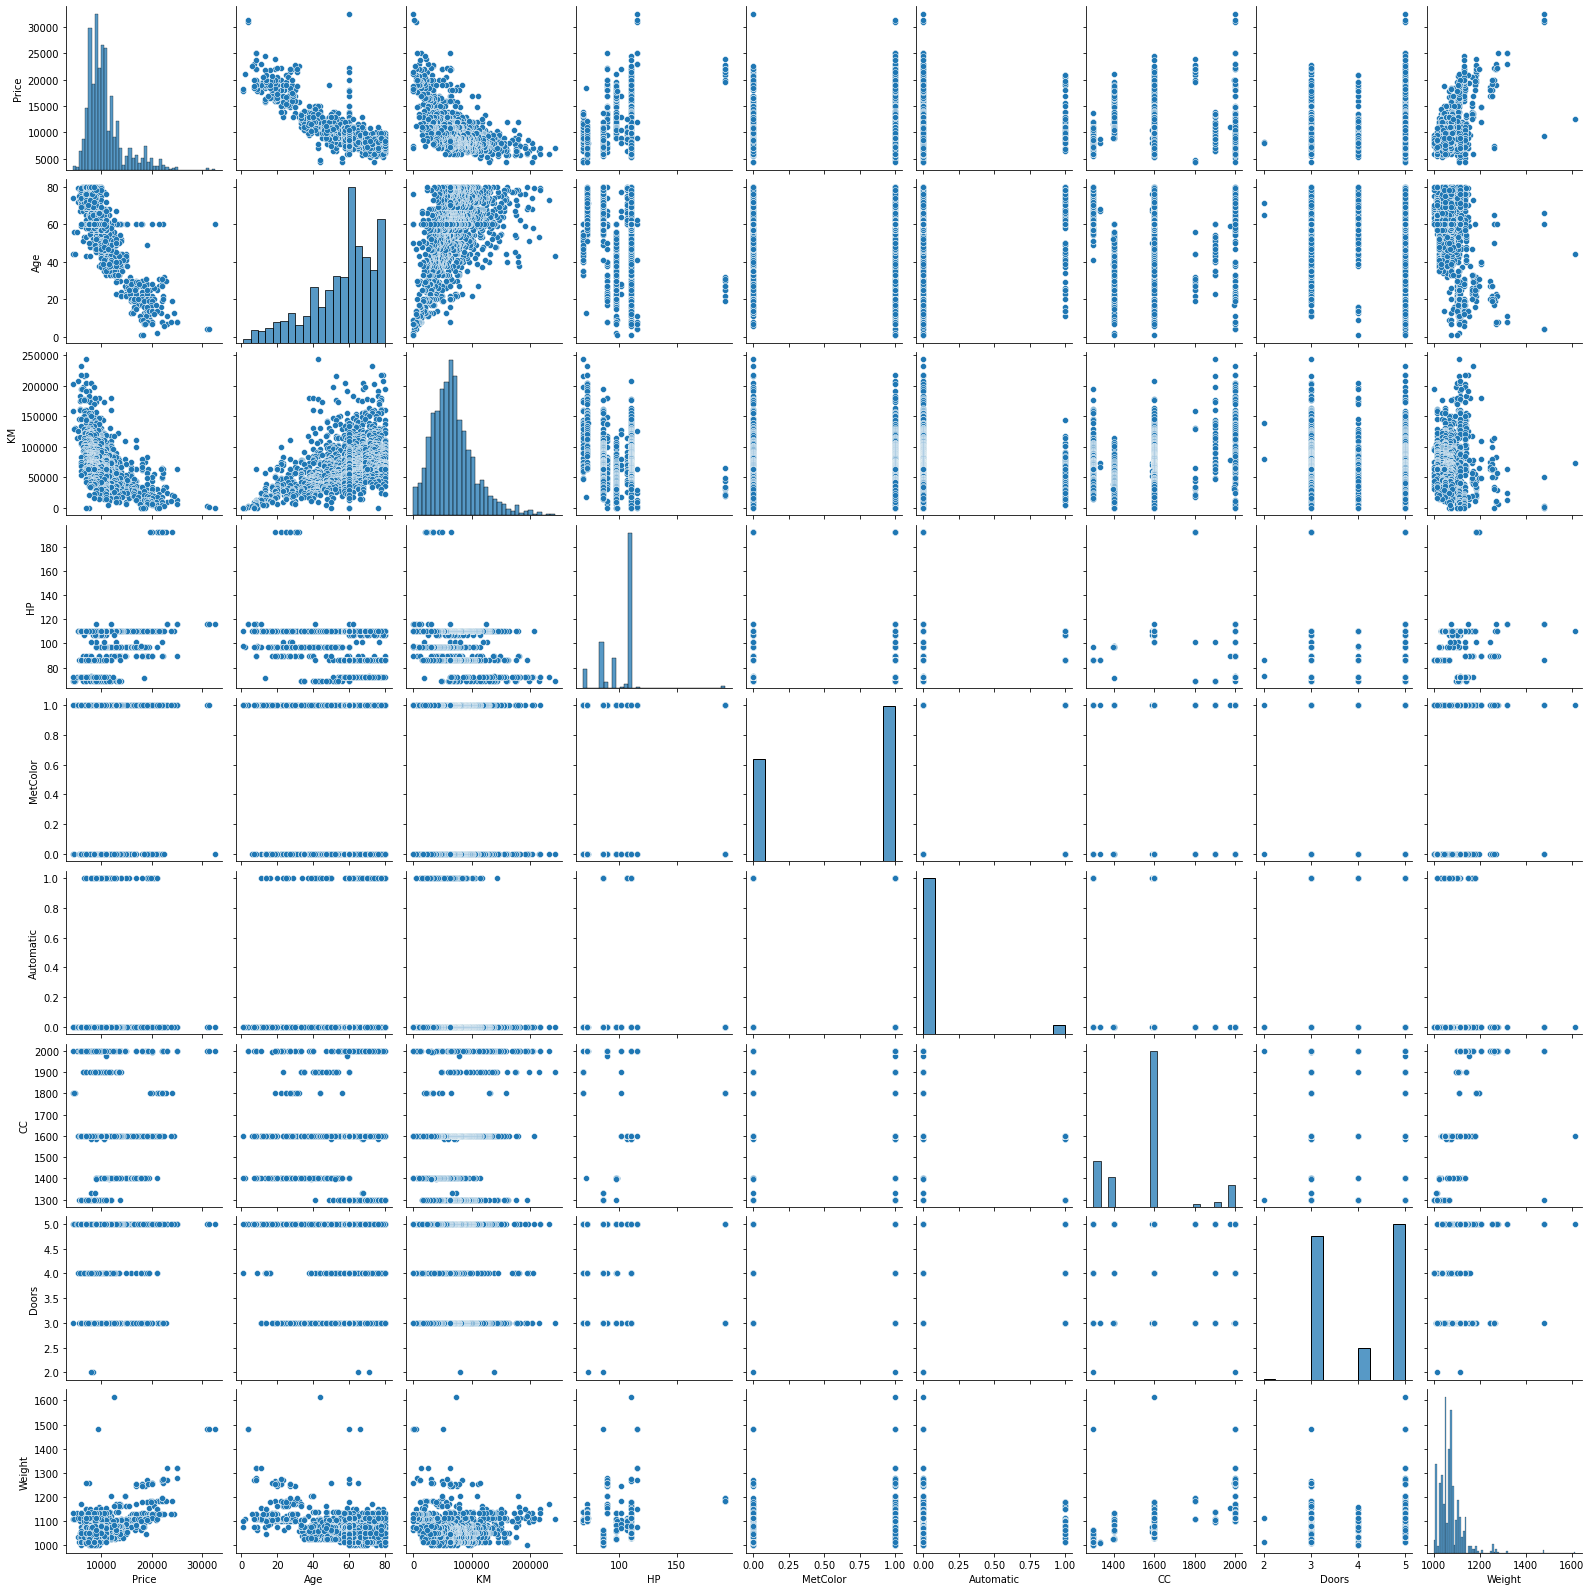

In [27]:
sns.pairplot(car)

In [23]:
car.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

** Missing Values are treated successfully.

### Handling the Outliers

In [28]:
import warnings
warnings.filterwarnings('ignore')

##### To figure out the outliers.

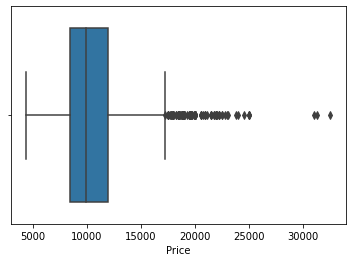

In [29]:
sns.boxplot(car['Price'])

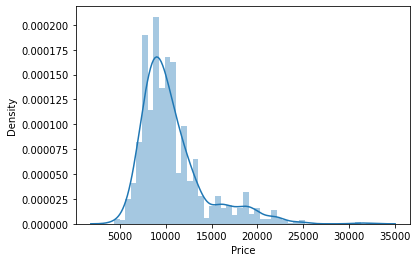

In [30]:
sns.distplot(car['Price'])

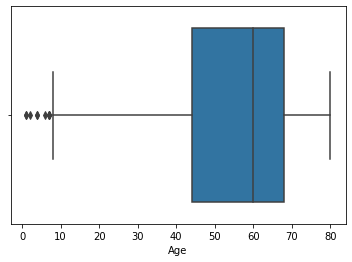

In [31]:
sns.boxplot('Age', data=car)

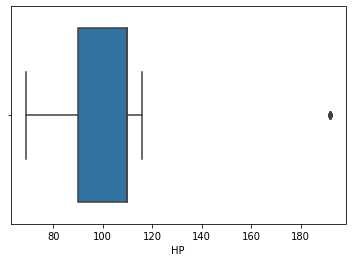

In [32]:
sns.boxplot(car['HP'])

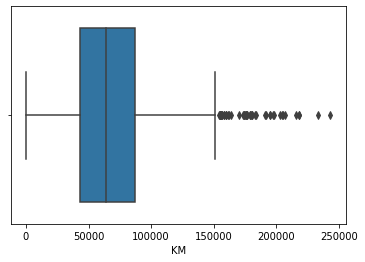

In [33]:
sns.boxplot(car['KM'])

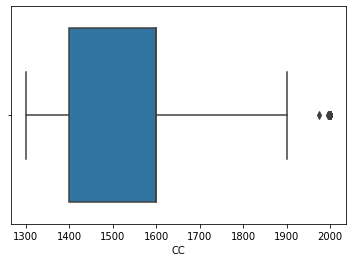

In [34]:
sns.boxplot(car['CC'])

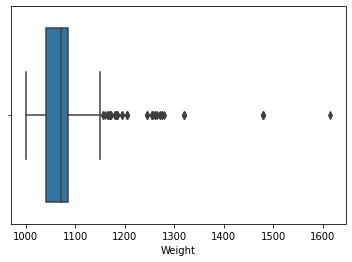

In [35]:
sns.boxplot(car['Weight'])

In [24]:
lower_limit = car['Price'].mean() - 3*car['Price'].std()
print("Lower Bound:", lower_limit)
upper_limit = car['Price'].mean() + 3*car['Price'].std()
print("Upper Bound:", upper_limit)

Lower Bound: -150.06924219589928
Upper Bound: 21611.718267265536


In [25]:
#Detecting Outliers
Price_Outliers = car[(car['Price']>upper_limit) | (car['Price']<lower_limit)]
print(len(Price_Outliers))

26


In [26]:
# Creating new Dataframe by removing Outliers
car_no_Price_Outliers = car[(car['Price']>lower_limit) & (car['Price']<upper_limit)]
car_no_Price_Outliers.shape

(1410, 10)

In [28]:
df1=car.copy()

In [29]:
df1['Price'].describe()

count     1436.000000
mean     10730.824513
std       3626.964585
min       4350.000000
25%       8450.000000
50%       9900.000000
75%      11950.000000
max      32500.000000
Name: Price, dtype: float64

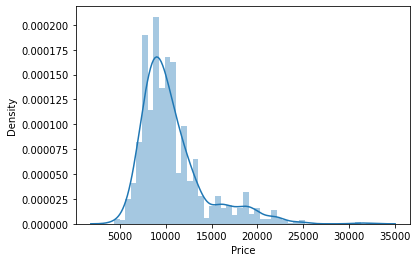

In [46]:
# Before imputing Outliers
import seaborn as sns
sns.distplot(df1['Price'])

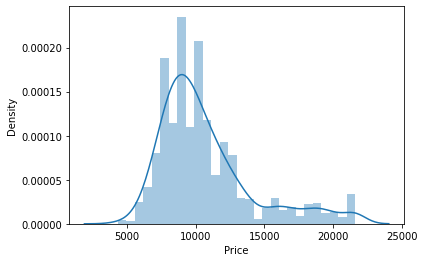

In [48]:
df1.loc[df1.Price>upper_limit,'Price']=upper_limit
df1.loc[df1.Price<lower_limit,'Price']=lower_limit
df1['Price'].describe()
# After imputing Outliers
import seaborn as sns
sns.distplot(df1['Price'])

In [49]:
df1['CC'].describe()
q1 = car['CC'].quantile(0.25)
q3 = car['CC'].quantile(0.75)
IQR = q3 - q1
print(q1,q3,IQR)
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
print("Lower Bound:",lower_limit)
print("Upper Bound:",upper_limit)

1400.0 1600.0 200.0
Lower Bound: 1100.0
Upper Bound: 1900.0


In [50]:
CC_Outliers = car[(car['CC']>upper_limit) | (car['CC']<lower_limit)]
print(len(CC_Outliers))

122


In [52]:
# Imputing 'CC' Outliers

df1.loc[df1.CC>upper_limit,'CC']=upper_limit
df1.loc[df1.CC<lower_limit,'CC']=lower_limit
df1['CC'].describe()

count    1436.000000
mean     1558.356546
std       168.733073
min      1300.000000
25%      1400.000000
50%      1600.000000
75%      1600.000000
max      1900.000000
Name: CC, dtype: float64

#### Splitting the data into Train and Test sets.

In [53]:
from sklearn.model_selection import train_test_split 

# split the data into train and test sets
x=df1.KM.values.reshape(-1,1)
y=df1.Price.values.reshape(-1,1)
train_x,test_x,train_y,test_y = train_test_split(x, y, test_size=0.2)

In [54]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1148, 1)
(1148, 1)
(288, 1)
(288, 1)


(array([ 96., 241., 336., 245., 116.,  58.,  31.,  12.,   9.,   4.]),
 array([1.000000e+00, 2.329490e+04, 4.658880e+04, 6.988270e+04,
        9.317660e+04, 1.164705e+05, 1.397644e+05, 1.630583e+05,
        1.863522e+05, 2.096461e+05, 2.329400e+05]),
 <a list of 10 Patch objects>)

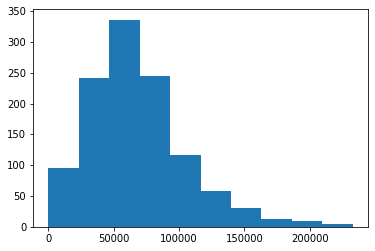

In [55]:
plt.hist(train_x)

(array([19., 61., 80., 70., 31., 17.,  5.,  3.,  1.,  1.]),
 array([1.500000e+01, 2.431350e+04, 4.861200e+04, 7.291050e+04,
        9.720900e+04, 1.215075e+05, 1.458060e+05, 1.701045e+05,
        1.944030e+05, 2.187015e+05, 2.430000e+05]),
 <a list of 10 Patch objects>)

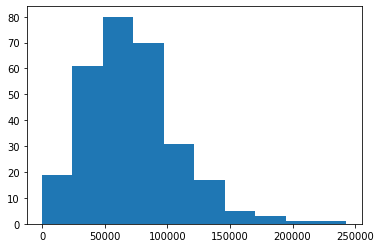

In [56]:
plt.hist(test_x)

(array([ 23., 149., 357., 267., 153.,  46.,  42.,  33.,  36.,  42.]),
 array([ 4350.        ,  6076.17182673,  7802.34365345,  9528.51548018,
        11254.68730691, 12980.85913363, 14707.03096036, 16433.20278709,
        18159.37461381, 19885.54644054, 21611.71826727]),
 <a list of 10 Patch objects>)

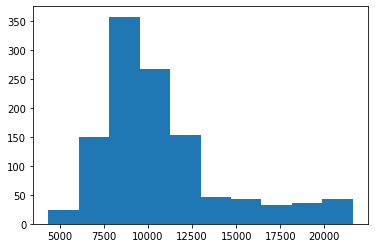

In [57]:
plt.hist(train_y)

(array([15., 60., 98., 47., 30.,  8.,  8., 10.,  7.,  5.]),
 array([ 5150.        ,  6796.17182673,  8442.34365345, 10088.51548018,
        11734.68730691, 13380.85913363, 15027.03096036, 16673.20278709,
        18319.37461381, 19965.54644054, 21611.71826727]),
 <a list of 10 Patch objects>)

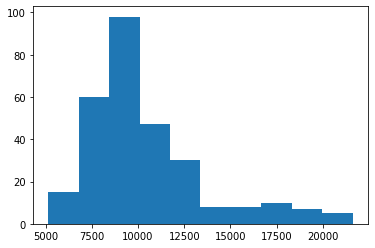

In [58]:
plt.hist(test_y)

#### Applying Model: Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

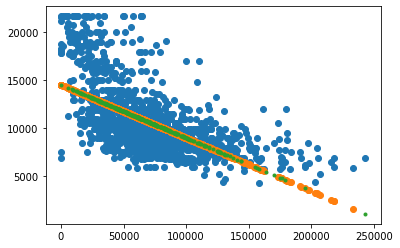

In [61]:
train_y_pred=lm.predict(train_x)
test_y_pred=lm.predict(test_x)

plt.scatter(x,y)
plt.scatter(train_x,train_y_pred)
plt.scatter(test_x,test_y_pred,marker='.')

#### Evaluating the model

In [67]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(train_y,train_y_pred)
rmse=np.sqrt(mse)
print("MSE: ",mse,"\nRMSE: ",rmse)
print("x.max:",x.max(),"\nx.min:",x.min(),"\ny.max:",y.max(),"\ny.min:",y.min())

MSE:  8156253.225683068 
RMSE:  2855.9154794361593
x.max: 243000.0 
x.min: 1.0 
y.max: 21611.718267265536 
y.min: 4350.0


In [68]:
mse=mean_squared_error(test_y,test_y_pred)
rmse=np.sqrt(mse)
print("MSE: ",mse,"\nRMSE: ",rmse)
print("x.max:",x.max(),"\nx.min:",x.min(),"\ny.max:",y.max(),"\ny.min:",y.min())

MSE:  7653613.226873532 
RMSE:  2766.5164425453054
x.max: 243000.0 
x.min: 1.0 
y.max: 21611.718267265536 
y.min: 4350.0


In [69]:
newval=pd.DataFrame({'km':[4000,50000,95,100000]})
lm.predict(newval)

array([[14279.07472041],
       [11742.86839419],
       [14494.37658354],
       [ 8986.12238743]])